In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zomato_real = pd.read_csv('/content/drive/MyDrive/Data/zomato.csv')
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
zomato_real.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [ ]:
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) 

In [ ]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [ ]:
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)

In [ ]:
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

In [ ]:
zomato['cost'] = zomato['cost'].astype(str) 
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) 
zomato['cost'] = zomato['cost'].astype(float)

In [ ]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

In [ ]:
zomato['rate'].min()

1.8

In [ ]:
zomato['rate'].max()

4.9

In [ ]:
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [ ]:
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

In [ ]:
zomato["reviews_list"] = zomato["reviews_list"].str.lower()

In [ ]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

In [ ]:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
32956,rated 50 ratedn amazing take away home deliv...,"Andhra, Biryani, North Indian, Beverages"
1819,rated 10 ratedn ive visited this hotel badly ...,Chinese
10360,rated 20 ratedn burger was not good as expect...,"Street Food, Beverages"
24885,rated 50 ratedn they are disable friendly exc...,"Cafe, Fast Food"
9205,rated 30 ratedn had stayed here so had the ch...,"Finger Food, Fast Food, Continental"


In [ ]:
restaurant_names = list(zomato['name'].unique())
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]

In [ ]:
zomato=zomato.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)

In [ ]:
import pandas
df_percent = zomato.sample(frac=0.5)

In [ ]:
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

In [ ]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

In [ ]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
import pickle

pickle.dump(cosine_similarities, open("res_model.sav", 'wb'))

In [ ]:
new_model = pickle.load(open("res_model.sav", 'rb'))

In [ ]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new
recommend('Pai Vihar', new_model)

TOP 9 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Lavonne,"Cafe, Desserts",4.35,800.0
CafãÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Felix,"American, Cafe, Continental",4.35,1.7
The Lantern Restaurant & Bar - The Ritz-Carlton...,Chinese,4.28,3.5
Hotel Tom'S Restaurant,"Mangalorean, Seafood, Chinese, North Indian",4.15,1.0
Nando'S,"Portuguese, Wraps, Burger, Salad",4.13,1.2
Marzipan Cafe & Bakery,"Cafe, Mediterranean, Bakery, Greek",4.10,700.0
Forage,"Healthy Food, Beverages, European, Salad",4.03,1.5
Watson'S,"Finger Food, Chinese, Continental",3.95,1.3
Pai Vihar,"South Indian, Street Food, Chinese, Fast Food",2.48,400.0


In [ ]:
recommend('Red Chilliez').max()    # TOP  RESTAURANTS LIKE Red Chilliez WITH SIMILAR REVIEWS

TOP 10 RESTAURANTS LIKE Red Chilliez WITH SIMILAR REVIEWS: 


cuisines       South Indian, North Indian, Chinese, Street Fo...
Mean Rating                                                 3.58
cost                                                       900.0
dtype: object

In [ ]:
recommend('Red Chilliez').head(5)

TOP 10 RESTAURANTS LIKE Red Chilliez WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Pallavi Restaurant,"Biryani, Chinese, Andhra",3.58,500.0
Donne Biriyani Angadi Mane,"Biryani, Chinese",3.47,250.0
Red Chilliez,"North Indian, Chinese, Seafood, Mangalorean",3.26,650.0
Sri Krishna Sagar,"South Indian, North Indian",3.26,300.0
Desi Dhaba,"North Indian, Chinese",3.19,400.0


In [ ]:
recommend('Red Chilliez')  # TOP 10 RESTAURANTS LIKE Red Chilliez WITH SIMILAR REVIEWS

TOP 10 RESTAURANTS LIKE Red Chilliez WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Pallavi Restaurant,"Biryani, Chinese, Andhra",3.58,500.0
Donne Biriyani Angadi Mane,"South Indian, Biryani",3.47,250.0
Red Chilliez,"North Indian, Chinese, Seafood, Mangalorean",3.26,650.0
Sri Krishna Sagar,South Indian,3.26,300.0
Desi Dhaba,"North Indian, Chinese",3.19,400.0
Desi Dhaba,"North Indian, Chinese, Rolls",3.19,300.0
Knight Ryders,"North Indian, Chinese",3.06,400.0
Melange - Hotel Ekaa,"North Indian, Chinese, Continental, Mangalorean",2.81,900.0
Punjabi Tasty Khana,"North Indian, Chinese, Biryani",2.68,450.0
Taza Khaana,"Chinese, North Indian",2.63,450.0


In [ ]:
((zomato['rate']>=1) & (zomato['rate']<2)).sum()

5

In [ ]:
((zomato['rate']>=2) & (zomato['rate']<3)).sum()

2211

In [ ]:
((zomato['rate']>=3) & (zomato['rate']<4)).sum()

26726

In [ ]:
(zomato['rate']>=4).sum()

12295

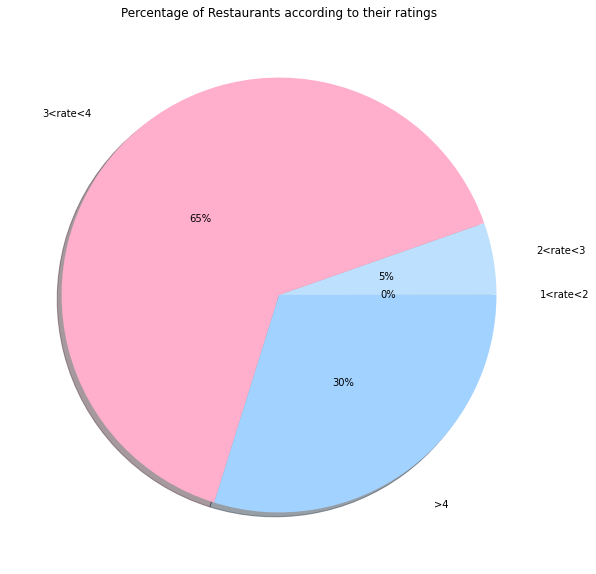

In [ ]:
suyash=[((zomato['rate']>=1) & (zomato['rate']<2)).sum(),
        ((zomato['rate']>=2) & (zomato['rate']<3)).sum(),
        ((zomato['rate']>=3) & (zomato['rate']<4)).sum(),
        (zomato['rate']>=4).sum()
        ]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#a2d2ff','#bde0fe','#ffafcc']
plt.pie(suyash,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

In [ ]:
recommend('Marwa Restaurant').head(5)

TOP 4 RESTAURANTS LIKE Marwa Restaurant WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Al-Badia Restaurant,Arabian,4.10,700.0
Just Shawarma,"Arabian, Fast Food",3.66,300.0
Urban Grills Restaurant,"Arabian, North Indian, Biryani",3.19,700.0
Arabian Bites,"North Indian, Chinese",3.06,300.0
